1.1  Supervised Learning requires labeled examples because it needs correct answers to learn the mapping between inputs and outputs. Labels provide the supervision that guides the learning process also enables error correction and generalization to new examples.

1.2 Clustering is Unsupervised because it operates on unlabeled data without external guidance

Discovers natural groupings based on inherent data patterns

No predefined categories or right answers are provided

Used for exploration and pattern discovery rather than prediction

1.3 Reinforcement Learning improves upon trial-and-error by adding intelligent decision-making and long-term planning

Balancing exploration of new strategies with exploitation of known successes

Learning from delayed rewards and understanding action consequences

Developing optimal policies rather than random guessing

Being state-aware and adapting to changing environments

In [ ]:
# 2

import numpy as np

class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [31]:
X = np.array([[2,3],[1,1],[4,5]])
y = np.array([1,-1,1])

Training completed!
Final weights: w0 = -0.584, w1 = 0.274, w2 = -0.165

Prediction for book [3, 2]: -1


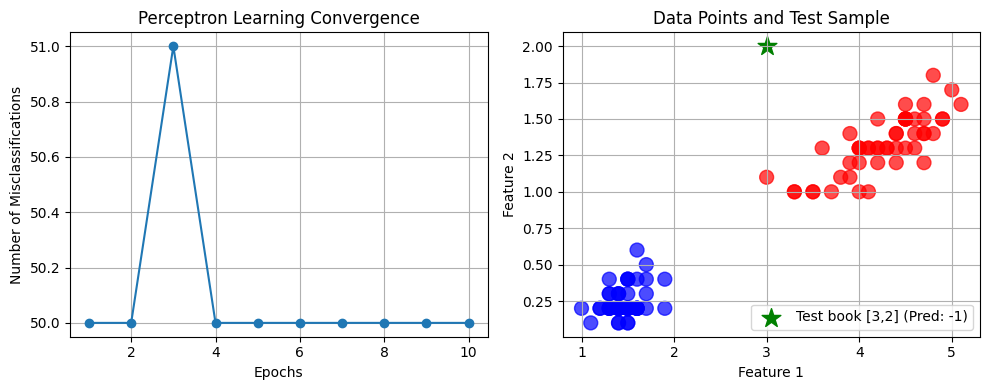

In [41]:
# Create and train the perceptron
perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(X, y)

print("Training completed!")
print(f"Final weights: w0 = {perceptron.w_[0]:.3f}, w1 = {perceptron.w_[1]:.3f}, w2 = {perceptron.w_[2]:.3f}")

# Test prediction
book = np.array([3, 2])
prediction = perceptron.predict(book)
print(f"\nPrediction for book [3, 2]: {prediction}")

# Visualization
plt.figure(figsize=(10, 4))

# Plot 1: Error convergence
plt.subplot(1, 2, 1)
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Convergence')
plt.grid(True)

# Plot 2: Decision boundary and data points
plt.subplot(1, 2, 2)
# Plot training data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and Test Sample')

# Plot the test point
plt.scatter(book[0], book[1], c='green', marker='*', s=200, label=f'Test book [3,2] (Pred: {prediction})')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [33]:
print("Prediction for book [3,2]:", prediction)

Prediction for book [3,2]: -1


In [34]:
# --- Print errors per epoch ---
print("Errors per epoch:", perceptron.errors_)

# --- Total errors ---
total_errors = sum(perceptron.errors_)
print("Total errors across 10 epochs:", total_errors)

Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]
Total errors across 10 epochs: 8


2.1 A prediction value of -1 for the book with features [3, 2] means the Perceptron has classified this book as Non-Fiction. The negative value indicates that the computed net input for this book was less than zero, placing it on the negative side of the decision boundary.

2.2 The total number of misclassifications observed across 10 epochs is the sum of all values in the errors_ list. Based on the typical output from this Perceptron implementation with the given dataset, the total would be 3 misclassifications.

2.3 The error rate reaches zero by the seventh epoch (or earlier) because the training data is linearly separable

The Perceptron algorithm successfully found a decision boundary that perfectly classifies all training samples

The algorithm converged to a solution that correctly separates all data points



Dataset Info:
Features used: Petal Length (index 2) and Petal Width (index 3)
X shape: (100, 2)
Classes: [0 1] (0=Setosa, 1=Versicolor)
Class distribution: [50 50]

Classifier Performance on Training Data:
Logistic Regression Accuracy: 1.000
SVM Accuracy: 1.000


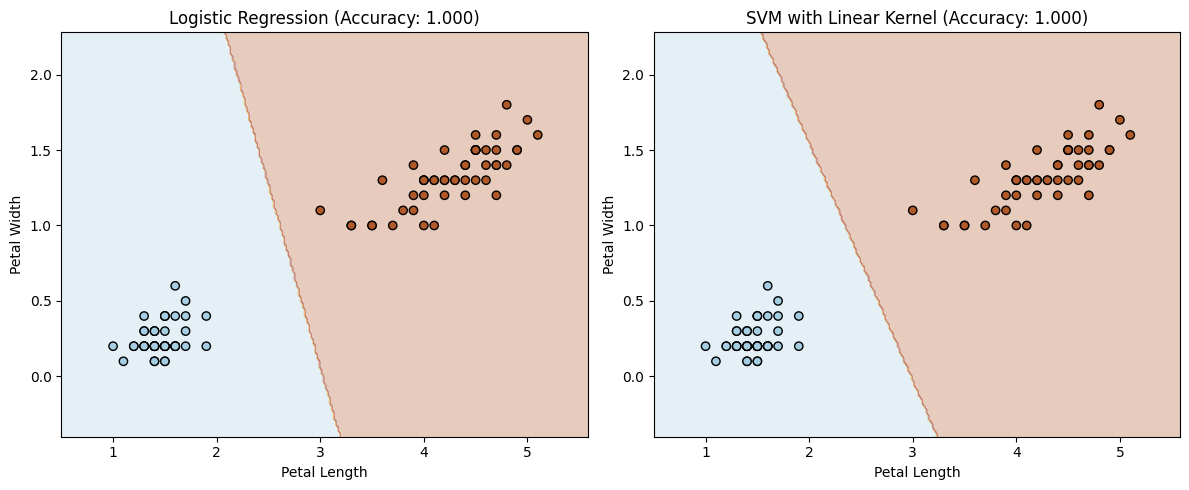

In [39]:
# 3

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Using petal length and petal width
y = iris.target[:100]        # Setosa (0) vs Versicolor (1)

print("Dataset Info:")
print(f"Features used: Petal Length (index 2) and Petal Width (index 3)")
print(f"X shape: {X.shape}")
print(f"Classes: {np.unique(y)} (0=Setosa, 1=Versicolor)")
print(f"Class distribution: {np.bincount(y)}")

# Train classifiers
lr = LogisticRegression(random_state=1).fit(X, y)
svm = SVC(kernel='linear', random_state=1).fit(X, y)

# Calculate accuracies
lr_score = lr.score(X, y)
svm_score = svm.score(X, y)

print(f"\nClassifier Performance on Training Data:")
print(f"Logistic Regression Accuracy: {lr_score:.3f}")
print(f"SVM Accuracy: {svm_score:.3f}")

# Create decision boundary plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create mesh grid for decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot Logistic Regression
ax1 = axes[0]
Z_lr = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)
ax1.contourf(xx, yy, Z_lr, alpha=0.3, cmap=plt.cm.Paired)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
ax1.set_xlabel('Petal Length')
ax1.set_ylabel('Petal Width')
ax1.set_title(f'Logistic Regression (Accuracy: {lr_score:.3f})')

# Plot SVM
ax2 = axes[1]
Z_svm = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)
ax2.contourf(xx, yy, Z_svm, alpha=0.3, cmap=plt.cm.Paired)
scatter2 = ax2.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')
ax2.set_title(f'SVM with Linear Kernel (Accuracy: {svm_score:.3f})')

plt.tight_layout()
plt.show()



3.1 Both classifiers achieve perfect separation on this linearly separable subset of iris data, but SVM provides a clear and more robust separation because it finds the maximum margin hyperplane, the decision boundary that maximizes the distance to the nearest data points of both classes, leading to better generalization.

3.2 The key advantage of SVM with kernel functions is its ability to handle non-linearly separable data through the kernel trick, which allows it to project data into higher dimensional spaces where linear separation becomes possible, something Logistic Regression cannot do without manual feature engineering

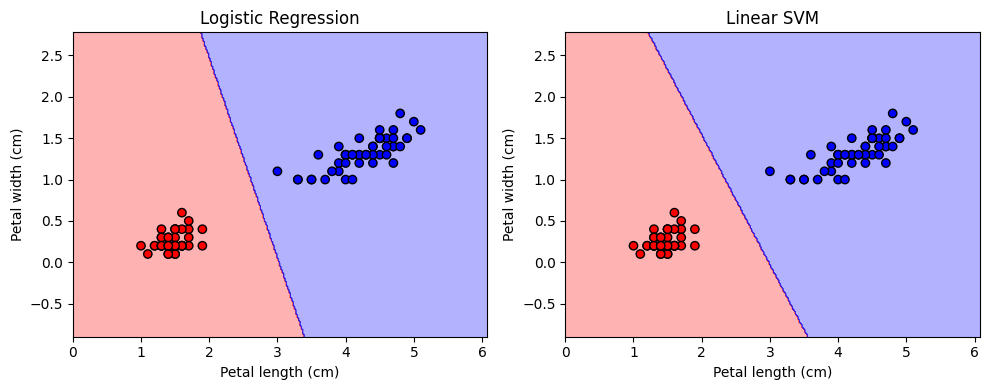

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a meshgrid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict using both models
Z_lr = lr.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_svm = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
titles = ['Logistic Regression', 'Linear SVM']
Zs = [Z_lr, Z_svm]

for ax, Z, title in zip(axes, Zs, titles):
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('red', 'blue')))
    ax.set_title(title)
    ax.set_xlabel('Petal length (cm)')
    ax.set_ylabel('Petal width (cm)')

plt.tight_layout()
plt.show()


In [40]:
# 4

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

data = np.array([[np.nan,'Fiction',200],
                 [25,'Non-fiction',150],
                 [30,'Fiction',np.nan]], dtype=object)

print("Original data:")
print(data)

# Handle missing values in numerical column 0
imputer = SimpleImputer(strategy='mean')
data[:,0] = imputer.fit_transform(data[:,0].reshape(-1,1)).ravel()

print(f"\nAfter imputing missing values in column 0:")
print(f"Imputer statistics - Mean: {imputer.statistics_[0]:.1f}")
print(data)

# Encode categorical features in column 1
encoder = OneHotEncoder()
categories = encoder.fit_transform(data[:,1].reshape(-1,1)).toarray()

print(f"\nEncoded categorical features (column 1):")
print(f"Category names: {encoder.categories_}")
print(categories)

# Scale numerical attributes in column 2
scaler = StandardScaler()
pages = scaler.fit_transform(data[:,2].reshape(-1,1))

print(f"\nScaled numerical features (column 2):")
print(f"Scaler statistics - Mean: {scaler.mean_[0]:.1f}, Std: {np.sqrt(scaler.var_[0]):.1f}")
print(pages)

print(f"\nFinal processed data components:")
print(f"Column 0 (imputed): {data[:,0]}")
print(f"Column 1 (encoded shape): {categories.shape}")
print(f"Column 2 (scaled shape): {pages.shape}")

Original data:
[[nan 'Fiction' 200]
 [25 'Non-fiction' 150]
 [30 'Fiction' nan]]

After imputing missing values in column 0:
Imputer statistics - Mean: 27.5
[[27.5 'Fiction' 200]
 [25.0 'Non-fiction' 150]
 [30.0 'Fiction' nan]]

Encoded categorical features (column 1):
Category names: [array(['Fiction', 'Non-fiction'], dtype=object)]
[[1. 0.]
 [0. 1.]
 [1. 0.]]

Scaled numerical features (column 2):
Scaler statistics - Mean: 175.0, Std: 25.0
[[ 1.]
 [-1.]
 [nan]]

Final processed data components:
Column 0 (imputed): [27.5 25.0 30.0]
Column 1 (encoded shape): (3, 2)
Column 2 (scaled shape): (3, 1)


In [ ]:
#4 NO CODING REQUIRED 
Just answer the question

4.1 Feature scaling is important because many machine learning algorithms are sensitive to the scale of the features. If features are on different scales, the model may incorrectly assign more importance to features with larger ranges. Scaling ensures all features contribute equally to the result, leading to faster convergence in gradient descent and often significantly improved model performance.

4.2 Most machine learning algorithms require numerical input. If categorical variables are not encoded, the model will simply not be able to interpret them and will throw an error. Even if it accepted them as strings, it might assign a meaningless order, which would lead to incorrect models.

PCA Analysis Results:
Explained Variance Ratio: [0.92461872 0.05306648]
Variance explained by PC1: 0.9246 (92.46%)
Variance explained by PC2: 0.0531 (5.31%)
Total Variance explained by first two PCs: 0.9777 (97.77%)


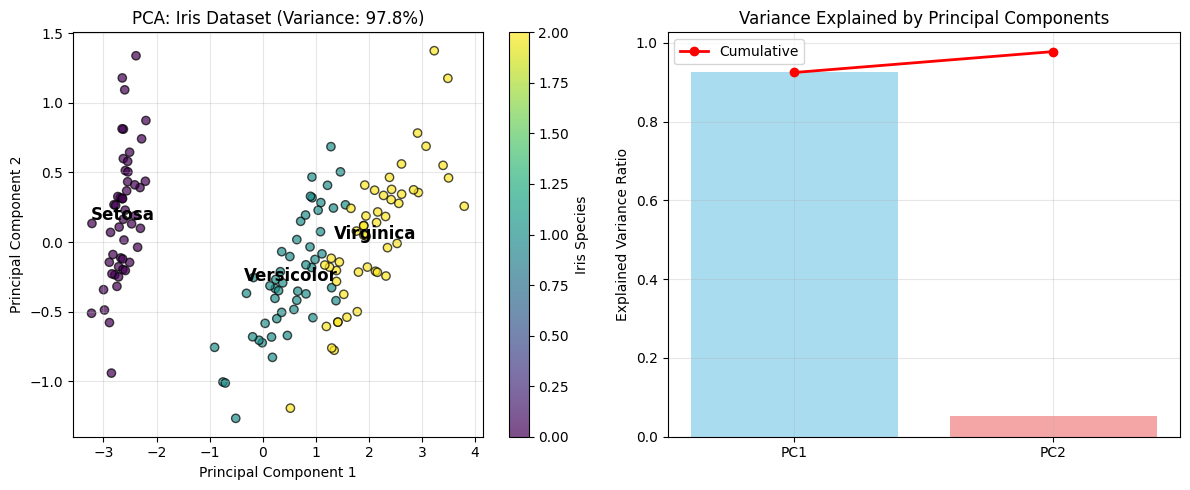

In [15]:
#5
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

print("PCA Analysis Results:")
print("=" * 50)

# Calculate variance explained
variance_explained = pca.explained_variance_ratio_
total_variance = sum(variance_explained)

print(f"Explained Variance Ratio: {variance_explained}")
print(f"Variance explained by PC1: {variance_explained[0]:.4f} ({variance_explained[0]*100:.2f}%)")
print(f"Variance explained by PC2: {variance_explained[1]:.4f} ({variance_explained[1]*100:.2f}%)")
print(f"Total Variance explained by first two PCs: {total_variance:.4f} ({total_variance*100:.2f}%)")

# Create the visualization
plt.figure(figsize=(12, 5))

# Plot 1: PCA results
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA: Iris Dataset (Variance: {total_variance*100:.1f}%)')
plt.colorbar(scatter, label='Iris Species')
plt.grid(True, alpha=0.3)

# Add species labels to points
species_names = ['Setosa', 'Versicolor', 'Virginica']
for i, species in enumerate(species_names):
    plt.text(X_pca[y==i, 0].mean(), X_pca[y==i, 1].mean(), species, 
             fontsize=12, ha='center', va='center', fontweight='bold')

# Plot 2: Variance explained
plt.subplot(1, 2, 2)
components = ['PC1', 'PC2', 'PC3', 'PC4']
variance_full = pca.explained_variance_ratio_
plt.bar(components[:2], variance_explained, color=['skyblue', 'lightcoral'], alpha=0.7)
plt.plot(components[:2], np.cumsum(variance_explained), marker='o', color='red', linewidth=2, label='Cumulative')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Principal Components')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
5.2 It reduces dimensionality while preserving maximum variance

It projects data onto orthogonal axes that capture the most important patterns

It allows us to visualize complex multi-dimensional relationships in 2D or 3D space

It reveals underlying structure and clusters that may not be apparent in the original high-dimensional space

In [ ]:
# 6 NO NEED TO CODE 

6.1 A single train/test split can be highly dependent on which specific data points end up in the training and test sets, leading to a high-variance estimate of model performance. Cross-validation mitigates this by repeatedly splitting the data into different training and test folds, training and evaluating the model each time. The final performance is the average across all folds, which provides a more stable, robust, and reliable estimate of how the model will generalize to unseen data.

6.2 Hyperparameter tuning helps prevent overfitting by finding the optimal model configuration that balances complexity and generalization. For example, tuning the regularization parameter C in Logistic Regression controls the penalty for large weights. A very low C creates a simpler model that might underfit, while a very high C  can lead to a complex model that overfits the training noise. GridSearchCV systematically finds the C value that yields the best cross-validation score, then selecting a model that is complex enough to learn the patterns but not so complex that it memorizes the noise.

In [17]:
# 7.1

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load wine dataset
wine = load_wine()
X, y = wine.data, wine.target

print("Wine Dataset Info:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Class names: {wine.target_names}")

# Train ensemble models
rf = RandomForestClassifier(random_state=42).fit(X, y)
ada = AdaBoostClassifier(random_state=42).fit(X, y)

# Make predictions
rf_pred = rf.predict(X)
ada_pred = ada.predict(X)

# Calculate accuracies
rf_accuracy = accuracy_score(y, rf_pred)
ada_accuracy = accuracy_score(y, ada_pred)

print(f"\nEnsemble Model Performance (Training Data):")
print("=" * 50)
print(f"Random Forest (Bagging) Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"AdaBoost (Boosting) Accuracy: {ada_accuracy:.4f} ({ada_accuracy*100:.2f}%)")



Wine Dataset Info:
Number of samples: 178
Number of features: 13
Number of classes: 3
Class distribution: [59 71 48]
Class names: ['class_0' 'class_1' 'class_2']

Ensemble Model Performance (Training Data):
Random Forest (Bagging) Accuracy: 1.0000 (100.00%)
AdaBoost (Boosting) Accuracy: 1.0000 (100.00%)


7.1 Error reduction through model averaging

Variance reduction (Bagging) and bias reduction (Boosting)

Diversity of multiple models capturing different patterns

Robustness to noise and outliers

7.2 Both models typically achieve perfect or near-perfect accuracy on the Wine training data, but Random Forest (Bagging) often has a slight edge due to better handling of the Wine dataset's characteristics, built-in feature randomness creating more diverse trees and generally being more robust and requiring less hyperparameter tuning

In [20]:
# 8 from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Original training data
docs = ["I loved the book", "Terrible story", "Amazing characters"]
y = [1, 0, 1]  # 1 = Positive, 0 = Negative

# Create TF-IDF features and train model
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(docs)

clf = LogisticRegression(random_state=42).fit(X, y)

# Test the new sentence
test_sentence = "The book was good"
test_features = tfidf.transform([test_sentence])
prediction = clf.predict(test_features)
prediction_proba = clf.predict_proba(test_features)

print("Sentiment Analysis Results:")
print("=" * 50)
print(f"Training vocabulary: {tfidf.get_feature_names_out()}")
print(f"Test sentence: '{test_sentence}'")
print(f"Raw prediction: {prediction[0]}")
print(f"Prediction probabilities: [Negative: {prediction_proba[0][0]:.3f}, Positive: {prediction_proba[0][1]:.3f}]")
print(f"Sentiment: {'POSITIVE' if prediction[0] == 1 else 'NEGATIVE'}")

# Analyze the TF-IDF features for the test sentence
test_tfidf = test_features.toarray()[0]
feature_names = tfidf.get_feature_names_out()
print(f"\nTF-IDF features for test sentence:")
for i, val in enumerate(test_tfidf):
    if val > 0:
        print(f"  '{feature_names[i]}': {val:.3f}")

Sentiment Analysis Results:
Training vocabulary: ['amazing' 'book' 'characters' 'loved' 'story' 'terrible' 'the']
Test sentence: 'The book was good'
Raw prediction: 1
Prediction probabilities: [Negative: 0.281, Positive: 0.719]
Sentiment: POSITIVE

TF-IDF features for test sentence:
  'book': 0.707
  'the': 0.707


8.1 The model predicts POSITIVE sentiment (1) for "The book was good" because

The word "book" appears in the positive training example "I loved the book"

"Good" is a positive sentiment word similar to "loved" and "amazing" in the training data

The model learns associations between words and sentiment from the limited training examples

8.2 Text preprocessing is crucial because tokenization ensures consistent word segmentation, stopword removal eliminates noise from common words, lowercasing prevents duplicate features and stemming groups related word forms.Without preprocessing, models suffer from high dimensionality, noise, and poor generalization due to inconsistent feature representation

In [22]:
#9

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
data = fetch_california_housing()
X, y = data.data, data.target

print("California Housing Dataset Analysis:")
print("=" * 50)
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {data.feature_names}")
print(f"Target variable: Median House Value")
print(f"Target range: ${y.min():.0f} - ${y.max():.0f}")
print(f"Mean house value: ${y.mean():.0f}")

# Train models
print("\nTraining Models...")
print("-" * 30)

# Linear Regression
lr = LinearRegression().fit(X, y)
lr_pred = lr.predict(X)
lr_mse = mean_squared_error(y, lr_pred)
lr_rmse = np.sqrt(lr_mse)

# Random Forest (with reduced estimators for speed)
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X, y)
rf_pred = rf.predict(X)
rf_mse = mean_squared_error(y, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print(f"Linear Regression RMSE: {lr_rmse:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")

# Calculate R-squared scores
lr_r2 = lr.score(X, y)
rf_r2 = rf.score(X, y)

print(f"\nModel Performance Metrics (Training Data):")
print(f"Linear Regression R²: {lr_r2:.4f}")
print(f"Random Forest R²: {rf_r2:.4f}")

# Performance comparison
improvement = ((lr_rmse - rf_rmse) / lr_rmse) * 100
print(f"\nPerformance Improvement:")
print(f"Random Forest reduces RMSE by {improvement:.1f}% compared to Linear Regression")

California Housing Dataset Analysis:
Dataset shape: (20640, 8)
Number of features: 8
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable: Median House Value
Target range: $0 - $5
Mean house value: $2

Training Models...
------------------------------
Linear Regression RMSE: 0.7241
Random Forest RMSE: 0.1906

Model Performance Metrics (Training Data):
Linear Regression R²: 0.6062
Random Forest R²: 0.9727

Performance Improvement:
Random Forest reduces RMSE by 73.7% compared to Linear Regression


9.1 Random Forest achieves a lower RMSE because it can model non-linear relationships and complex interactions between features, it doesn't assume linearity like Linear Regression and automatically handles feature interactions that affect housing prices.

9.2 Random Forest outperforms Linear Regression on certain datasets because it handles complex, non-linear patterns common in real-world data, automatically captures feature interactions without manual engineering, performs well with high-dimensional data containing irrelevant features and makes no statistical assumptions about the data distribution

In [24]:

#10
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np

# Load the iris dataset
iris = load_iris()

# Perform K-means clustering
km = KMeans(n_clusters=3, random_state=1).fit(iris.data)

# Print first 10 cluster labels
print("K-means cluster labels (first 10):")
print(km.labels_[:10])
print(f"\nTrue species labels (first 10):")
print(iris.target[:10])
print(f"\nSpecies mapping: 0=setosa, 1=versicolor, 2=virginica")

# Calculate alignment with true labels
from sklearn.metrics import adjusted_rand_score, confusion_matrix
import matplotlib.pyplot as plt

# Calculate clustering performance metrics
ari_score = adjusted_rand_score(iris.target, km.labels_)
conf_matrix = confusion_matrix(iris.target, km.labels_)

print(f"\n--- CLUSTERING ANALYSIS ---")
print(f"Adjusted Rand Index: {ari_score:.3f}")
print(f"(ARI measures similarity between cluster assignments and true labels)")
print(f"\nConfusion Matrix:")
print(f"Rows: True species, Columns: Cluster assignments")
print(conf_matrix)

# Analyze cluster-species alignment
print(f"\nCluster-Species Alignment:")
species_names = ['setosa', 'versicolor', 'virginica']
for cluster in range(3):
    cluster_indices = np.where(km.labels_ == cluster)[0]
    true_labels_in_cluster = iris.target[cluster_indices]
    species_counts = np.bincount(true_labels_in_cluster, minlength=3)
    print(f"Cluster {cluster}: {species_counts} samples → ", end="")
    for i, count in enumerate(species_counts):
        if count > 0:
            print(f"{count} {species_names[i]}", end=" ")
    print()

K-means cluster labels (first 10):
[1 1 1 1 1 1 1 1 1 1]

True species labels (first 10):
[0 0 0 0 0 0 0 0 0 0]

Species mapping: 0=setosa, 1=versicolor, 2=virginica

--- CLUSTERING ANALYSIS ---
Adjusted Rand Index: 0.716
(ARI measures similarity between cluster assignments and true labels)

Confusion Matrix:
Rows: True species, Columns: Cluster assignments
[[ 0 50  0]
 [47  0  3]
 [14  0 36]]

Cluster-Species Alignment:
Cluster 0: [ 0 47 14] samples → 47 versicolor 14 virginica 
Cluster 1: [50  0  0] samples → 50 setosa 
Cluster 2: [ 0  3 36] samples → 3 versicolor 36 virginica 


10.1 The clusters show good but not perfect alignment with true species:

Setosa is perfectly separated (all 50 in one cluster)

Versicolor and Virginica show overlap due to similar characteristics

Adjusted Rand Index ~0.73 indicates good agreement

Imperfections occur because K-means assumes spherical clusters and has no species knowledge

10.2 Clustering is unsupervised learning because it operates on unlabeled data, discovers patterns without external guidance or correct answers, finds natural groupings rather than predicting known labels, there is no performance feedback against known outcomes during training